In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
cleaned_data = pd.read_csv("clean_dataset_2019_2022.csv")
cleaned_data.dtypes

customer_id                 int64
product_id                  int64
basket_id                   int64
loyalty                    object
household_type             object
age_band                   object
department                 object
brand                      object
commodity                  object
store                       int64
price                     float64
transaction_date           object
year                        int64
month                       int64
day_of_week                 int64
transaction_year_month     object
dtype: object

In [3]:
cleaned_data.head()

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,price,transaction_date,year,month,day_of_week,transaction_year_month
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,0.99,2020-10-05,2020,10,0,2020-10
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,0.70,2020-10-24,2020,10,5,2020-10
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,1.68,2020-10-18,2020,10,6,2020-10
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2.59,2020-10-23,2020,10,4,2020-10
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,0.60,2020-10-27,2020,10,1,2020-10


In [4]:
# Calculating revenue for each commodity, department, customer, month
revenue_by_commodity = cleaned_data.groupby('commodity')['price'].sum().sort_values()
revenue_by_department = cleaned_data.groupby('department')['price'].sum().sort_values()
revenue_by_customer = cleaned_data.groupby('customer_id')['price'].sum().sort_values()
revenue_by_month = cleaned_data.groupby('transaction_year_month')['price'].sum().sort_values()

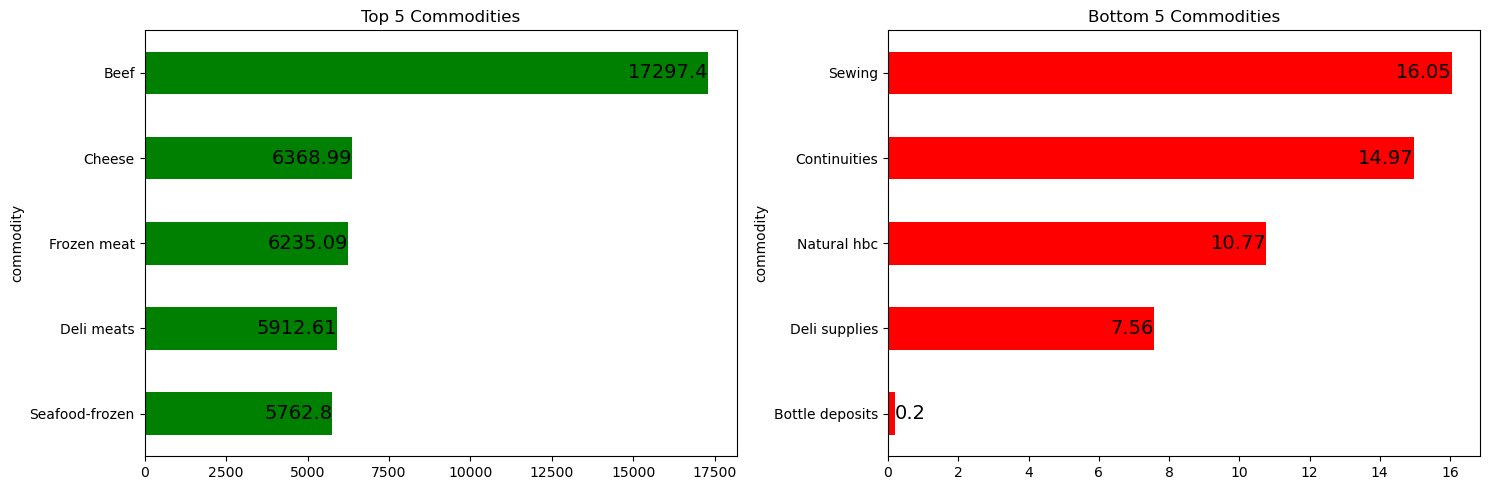

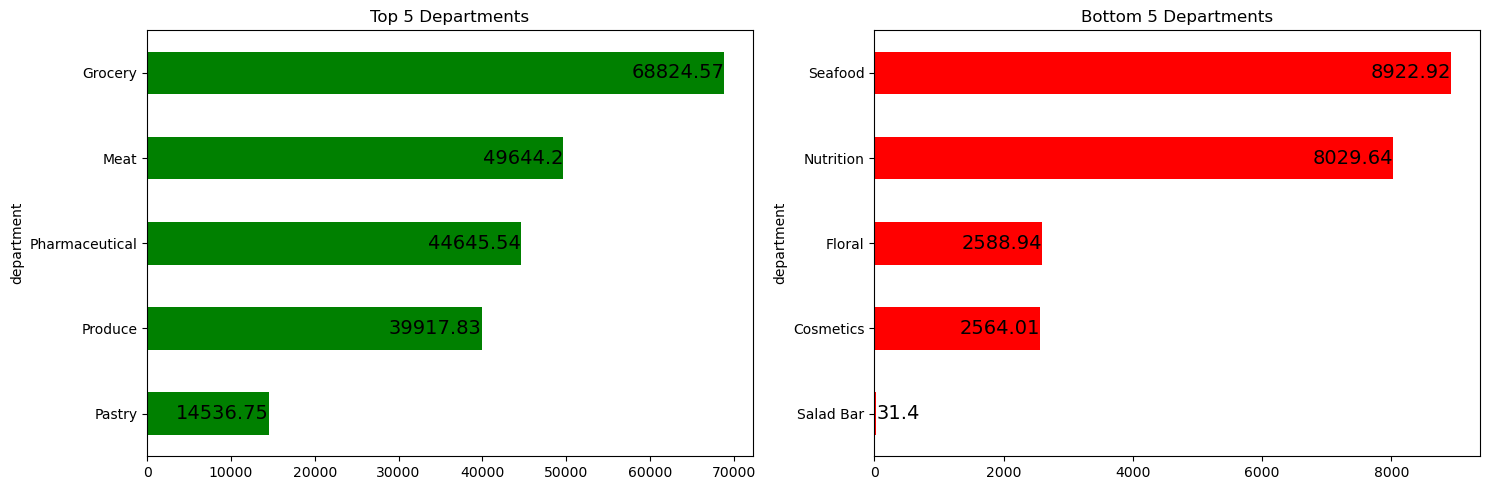

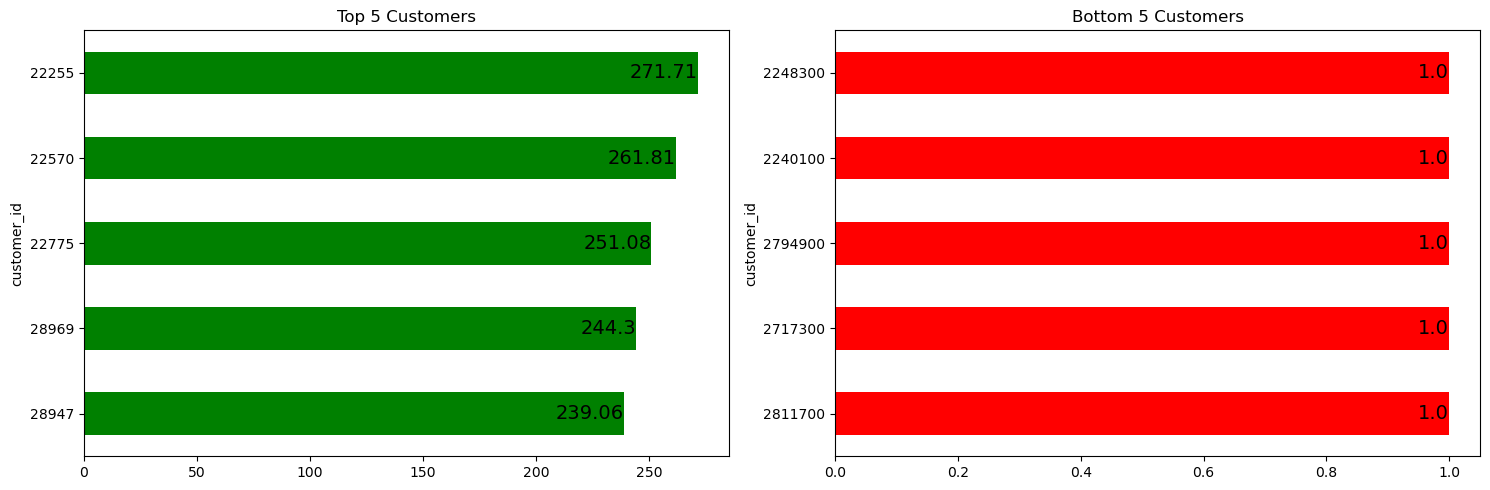

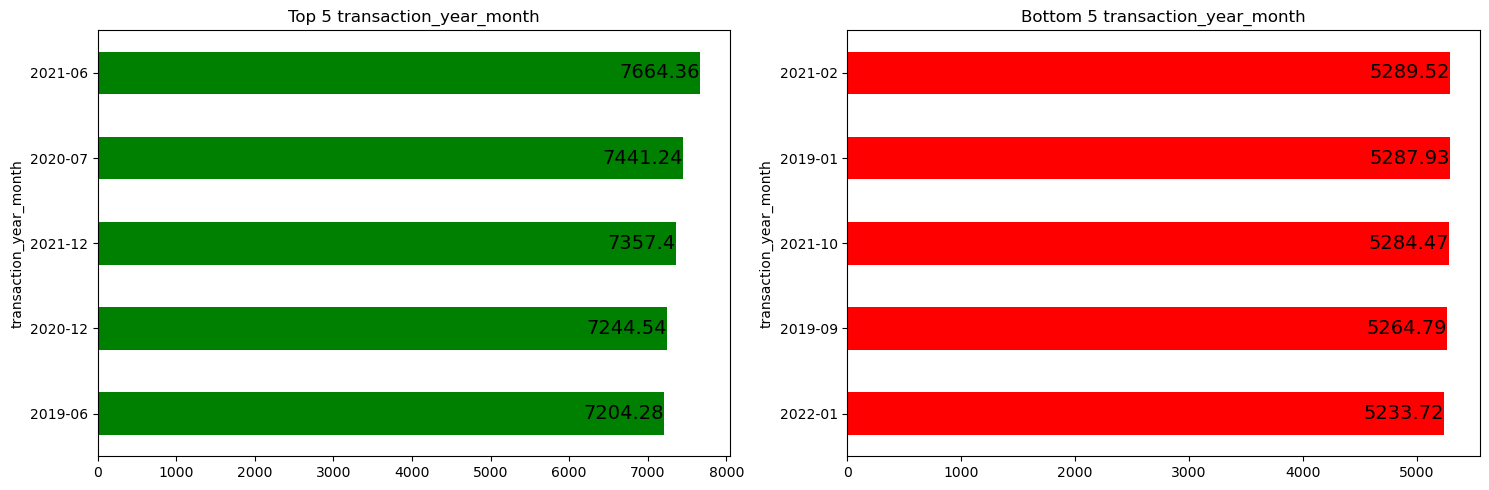

In [5]:

# Function to plot highest and lowest revenues
def plot_revenue_barchart(data, title, n=5, chart_type='horizontal'):
    # Selecting top n and bottom n
    top_n = data.tail(n)
    bottom_n = data.head(n)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    top_n.plot(kind='barh', ax=ax[0], color='green')
    bottom_n.plot(kind='barh', ax=ax[1], color='red')

    ax[0].set_title(f'Top {n} {title}')
    ax[1].set_title(f'Bottom {n} {title}')
    add_labels(ax[0],chart_type=chart_type)
    add_labels(ax[1],chart_type=chart_type)
    plt.tight_layout()

        
def add_labels(ax, chart_type='vertical', fontsize=14, label_color='black', rotation=0, ha='center', threshold_ratio=0.1):
    """
    Add labels to the bars in a bar chart. This function can handle both horizontal and vertical bar charts.
    Labels will be placed appropriately based on the bar orientation and size.

    Parameters:
    - ax: The matplotlib axis object to add labels to.
    - chart_type: Type of the chart ('horizontal' or 'vertical').
    - fontsize: Font size of the labels (applies to horizontal charts).
    - label_color: Color of the label text (applies to horizontal charts).
    - rotation: The rotation angle of the labels in degrees (applies to vertical charts).
    - ha: The horizontal alignment of the labels (applies to vertical charts).
    - threshold_ratio: The ratio of bar size at which to switch label positions (applies to vertical charts).
    """
    # Determine the axis range for threshold calculation
    axis_range = ax.get_ylim()[1] - ax.get_ylim()[0] if chart_type == 'vertical' else ax.get_xlim()[1] - ax.get_xlim()[0]
    threshold = axis_range * threshold_ratio

    for bar in ax.patches:
        bar_value = bar.get_height() if chart_type == 'vertical' else bar.get_width()
        label_x_pos = bar.get_x() + bar.get_width() / 2 if chart_type == 'vertical' else bar.get_width()
        label_y_pos = bar.get_height() if chart_type == 'vertical' else bar.get_y() + bar.get_height() / 2

        # Adjust label position based on bar size and chart type
        if chart_type == 'vertical':
            if bar_value > threshold:
                # Label inside the bar
                label_y_pos = bar_value - (threshold * 0.5)
                va = 'center'
            else:
                # Label on top of the bar
                label_y_pos = bar_value + (threshold * 0.1)
                va = 'bottom'
            ax.annotate(format(bar_value, '.2f'), 
                        (label_x_pos, label_y_pos), 
                        ha=ha, va=va,
                        xytext=(0, 0), 
                        textcoords='offset points',
                        rotation=rotation)
        else:
            # Horizontal chart adjustments
            horizontal_alignment = 'right' if bar_value >= threshold else 'left'
            vertical_alignment = 'center'
            ax.text(label_x_pos, label_y_pos, round(bar_value, 2), 
                    va=vertical_alignment, ha=horizontal_alignment, 
                    fontsize=fontsize, color=label_color)    


# Plotting for commodities, departments, and customers
plot_revenue_barchart(revenue_by_commodity, 'Commodities',chart_type='horizontal')
plot_revenue_barchart(revenue_by_department, 'Departments',chart_type='horizontal')
plot_revenue_barchart(revenue_by_customer, 'Customers',chart_type='horizontal')
plot_revenue_barchart(revenue_by_month, 'transaction_year_month',chart_type='horizontal')

plt.show()


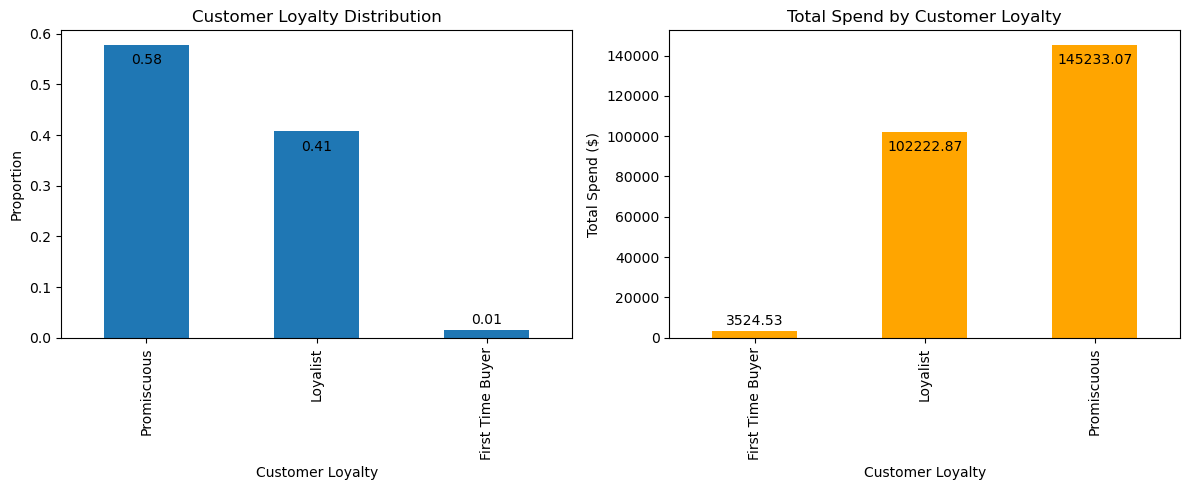

142.0

In [59]:
# Analyze Customer Loyalty Distribution
customer_type_distribution = cleaned_data['loyalty'].value_counts(normalize=True)

# Analyse Total Spend by Customer Loyalty
total_spend = cleaned_data.groupby('loyalty')['price'].sum()

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Customer Type Distribution
customer_type_distribution.plot(kind='bar', ax=ax1)
ax1.set_title('Customer Loyalty Distribution')
ax1.set_ylabel('Proportion')
ax1.set_xlabel('Customer Loyalty')
add_labels(ax1)  # Labels on top, inside=True

# Plot for Average Spend by Customer Type
total_spend.plot(kind='bar', color='orange', ax=ax2)
ax2.set_title('Total Spend by Customer Loyalty')
ax2.set_ylabel('Total Spend ($)')
ax2.set_xlabel('Customer Loyalty')
add_labels(ax2)  # Labels inside, inside=True

plt.tight_layout()
plt.show()

round(total_spend['Promiscuous']/total_spend['Loyalist']*100,0)


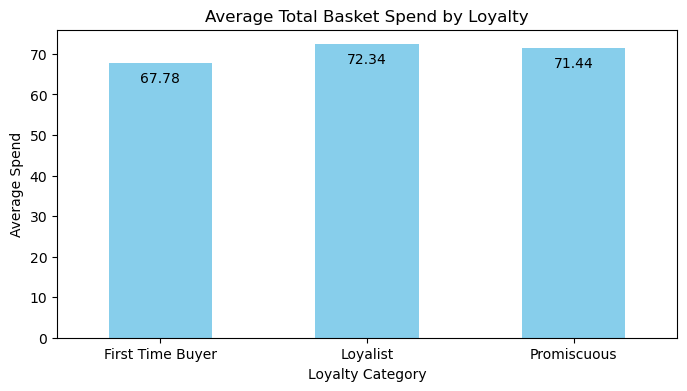

In [48]:
# Calculate the average spend on each basket
total_spend_per_basket = cleaned_data.groupby(['loyalty','basket_id'])['price'].sum().reset_index().rename(columns={'price': 'Total_Basket_Spend'})

# Analyze Average Spend by Customer Loyalty
total_spend = total_spend_per_basket.groupby('loyalty')['Total_Basket_Spend'].mean()

plt.figure(figsize=(8, 4))
ax = total_spend.plot(kind='bar', color='skyblue')  # ax is the Matplotlib Axes object

plt.title('Average Total Basket Spend by Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Average Spend')
plt.xticks(rotation=0)

# Call the add_labels function
# Assuming the chart type is 'vertical', as it's a bar chart
add_labels(ax, chart_type='vertical')

plt.show()

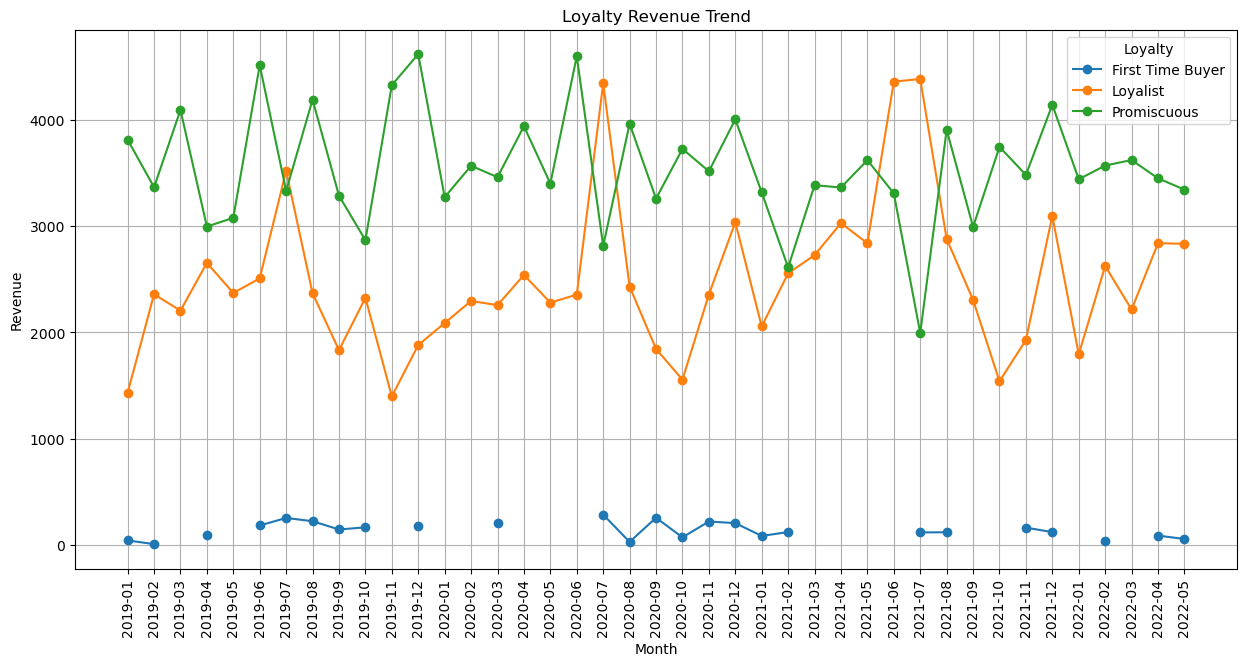

In [50]:
# Group by 'loyalty' and 'transaction_year_month' and sum the 'price'
revenue_by_loyalty_month = cleaned_data.groupby(['loyalty', 'transaction_year_month'])['price'].sum().unstack('loyalty')

# Sorting the DataFrame by date just in case it's not in order
revenue_by_loyalty_month = revenue_by_loyalty_month.sort_index()

# Plotting
plt.figure(figsize=(15, 7))

# Loop through the loyalty categories and plot each one as a separate line
for loyalty_category in revenue_by_loyalty_month.columns:
    plt.plot(revenue_by_loyalty_month.index, revenue_by_loyalty_month[loyalty_category], marker='o', label=loyalty_category)

plt.title('Loyalty Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Loyalty')
plt.grid(True)

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.show()


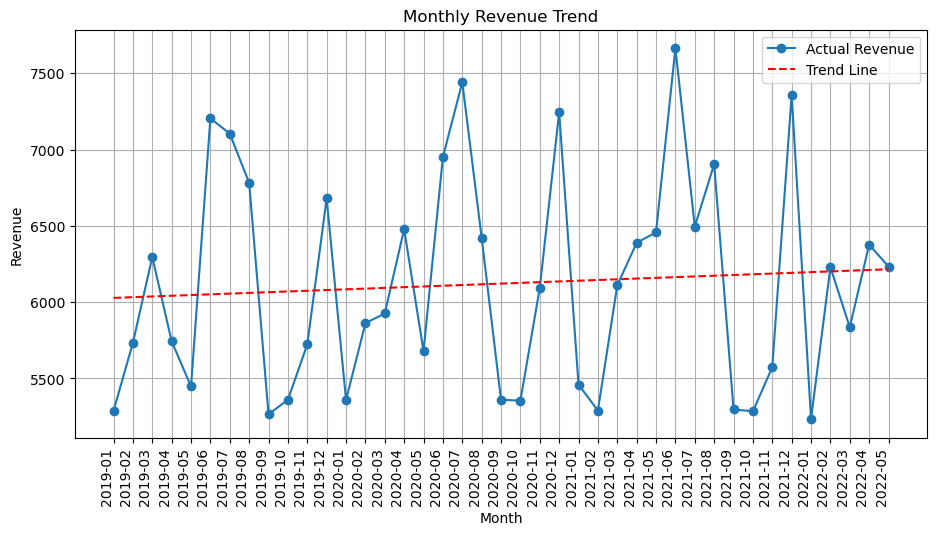

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# Group by 'transaction_year_month' and sum the 'price'
revenue_by_month = cleaned_data.groupby('transaction_year_month')['price'].sum()

# Sorting the Series by date just in case it's not in order
revenue_by_month.sort_index(inplace=True)

# Prepare data for trend line - Label encoding the dates for the regression model
label_encoder = LabelEncoder()
x = label_encoder.fit_transform(revenue_by_month.index.astype(str)).reshape(-1, 1)
y = revenue_by_month.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression().fit(x, y)
trend_line = model.predict(x)

# Plotting the actual data
plt.figure(figsize=(11, 6))
plt.plot(revenue_by_month.index, revenue_by_month.values, marker='o', label='Actual Revenue')

# Plotting the trend line
plt.plot(revenue_by_month.index, trend_line, label='Trend Line', linestyle='--', color='red')

# Beautify the x-labels
plt.gcf().autofmt_xdate()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


In [10]:
def generate_heatmap(df, category_col, cmap='viridis', figsize=(6, 5)):
    """
    Generates a heatmap for the specified category column against departments in the dataframe.
    
    Parameters:
    - df: DataFrame containing the data.
    - category_col: Column name for the category to group by (e.g., 'loyalty', 'household_type', 'age_band').
    - cmap: Colormap for the heatmap visualization.
    - figsize: Size of the figure.
    """
    # Group by category and department, then count the number of products
    category_dept_counts = df.groupby([category_col, 'department']).size().unstack(fill_value=0)

    # Sort categories and departments by the total count
    sorted_departments = category_dept_counts.sum(axis=0).sort_values(ascending=False).index
    sorted_categories = category_dept_counts.sum(axis=1).sort_values(ascending=False).index

    # Sort the DataFrame by the sorted categories and departments
    sorted_category_dept_counts = category_dept_counts.reindex(index=sorted_categories, columns=sorted_departments)

    # Create the heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(sorted_category_dept_counts, annot=True, fmt='d', cmap=cmap)
    
    # Rotate the annotations
    for text in ax.texts:
        text.set_rotation(90)  # Rotate 90 degrees for vertical reading

    # Rotate the x-axis labels if there are many departments
    plt.xticks(rotation=90, ha='right')

    # Set the title and labels
    plt.title(f'Product Preferences by {category_col.capitalize()}')
    plt.xlabel('Department')
    plt.ylabel(category_col.capitalize())

    # Show the plot
    plt.tight_layout()  # Adjust the layout
    plt.show()

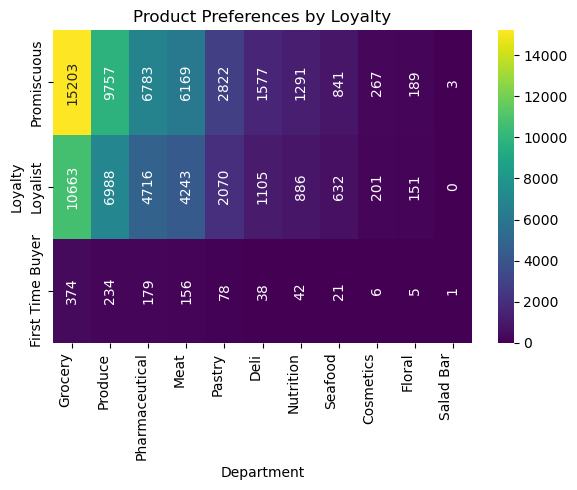

In [11]:
generate_heatmap(cleaned_data, 'loyalty')

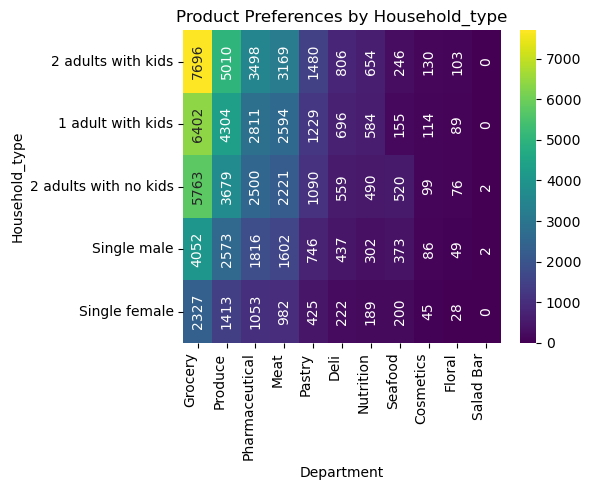

In [12]:
generate_heatmap(cleaned_data, 'household_type')

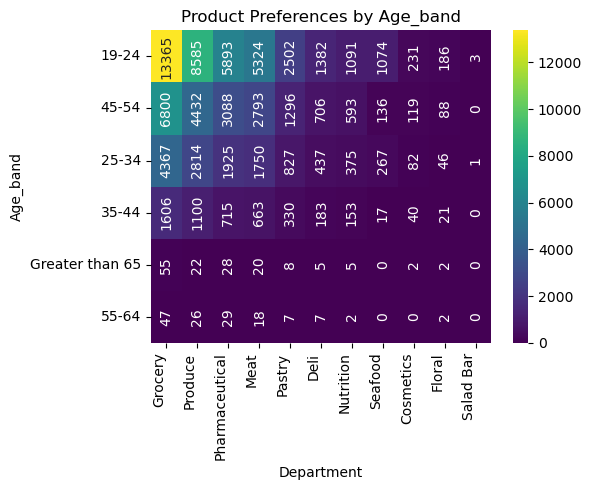

In [13]:
generate_heatmap(cleaned_data, 'age_band')